# Linear SVM Classification

SVM classifier as fitting the widest possible street(represented by the parallel dashed lines) between the classes. This is called large margin classification.

**Notice**<br>
adding more training instances "off the street" will not affect the decision boundary at all: it is fully determined(or "supported") by the instances located on the edge of the street. These instances are called the *support vector*

**SVMs are sensitice to the features scales**.

# Soft Margin Classification

The objective is to find a good balance between keeping the street as larage as possible and limiting the margin violations. This is called soft margin classification

In Scikit-Learn's SVM classes, we can control this balance using the C hyperparamter: a smaller C value leads to a wider street but more margin violations. Using a high C value the classifier makes fewer margin violations but ends up with a smaller margin

**If SVM model is overfitting, try regularizing it by reducing C**

**Trains a linear SVM model to detect Iris-Virginic flowers**

In [1]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

In [2]:
iris = datasets.load_iris()

In [3]:
X= iris["data"][:,(2,3)] # petal length, petal width
y = (iris["target"]==2).astype(np.float64) #Iris-virginica

In [4]:
svm_clf = Pipeline((
    ("scaler", StandardScaler()),
    ("linear_svc", LinearSVC(C=1, loss="hinge")),
))

In [5]:
svm_clf.fit(X,y)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('linear_svc', LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=None, tol=0.0001, verbose=0))])

In [6]:
svm_clf.predict([[5.5,1.7]])

array([1.])

**Unlike logistic Regression classifier, SVM classifiers do not output probabilities for each class**

# Nonlinear SVM Classification

In [7]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import PolynomialFeatures

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [8]:
polynomial_svm_clf = Pipeline((
    ("poly_features", PolynomialFeatures(degree=3)),
    ("scaler", StandardScaler()),
    ("svm_clf", LinearSVC(C=10, loss="hinge", random_state=42))
))

In [9]:
X, y = make_moons(n_samples=100, noise=0.15, random_state=42)
polynomial_svm_clf.fit(X,y)

Pipeline(memory=None,
     steps=[('poly_features', PolynomialFeatures(degree=3, include_bias=True, interaction_only=False)), ('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm_clf', LinearSVC(C=10, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=42, tol=0.0001, verbose=0))])

In [10]:
def plot_dataset(X,y, axes):
    plt.plot(X[:,0][y==0],X[:,1][y==0],"bs")
    plt.plot(X[:,0][y==1],X[:,1][y==1],"g^")
    plt.axis(axes)
    plt.grid(True,which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize = 20, rotation=0)

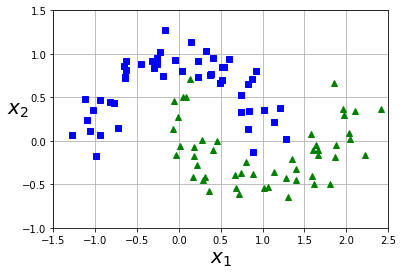

In [11]:
plot_dataset(X,y,[-1.5, 2.5, -1, 1.5])
plt.show()

In [13]:
def plot_prediction(clf, axes):
    x0s = np.linspace(axes[0],axes[1],100)
    x1s = np.linspace(axes[2],axes[3],100)
    x0, x1 = np.meshgrid(x0s,x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0,x1,y_pred,cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0,x1,y_decision, cmap = plt.cm.brg, alpha=0.1)


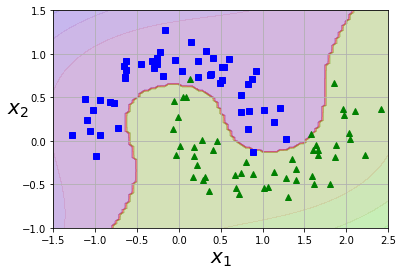

In [14]:
plot_prediction(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X,y, [-1.5,2.5, -1, 1.5])
plt.show()

## Polynomial Kernel

When using SVMs you can apply an almost miraculous mathematical technique called the *kernel trick* 

The hyperparameter coef0 controls how much the model is influenced by high-degree polynomials versus low-degree polynomials

In [16]:
from sklearn.svm import SVC

In [17]:
poly_kernel_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="poly",degree=3, coef0=1, C=5))
    
])
poly_kernel_svm_clf.fit(X,y)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm_clf', SVC(C=5, cache_size=200, class_weight=None, coef0=1,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

In [18]:
poly100_kernel_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="poly", degree=10, coef0=100, C=5))
])
poly100_kernel_svm_clf.fit(X,y)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm_clf', SVC(C=5, cache_size=200, class_weight=None, coef0=100,
  decision_function_shape='ovr', degree=10, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

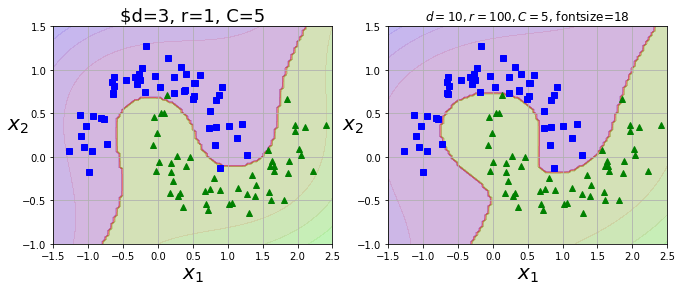

In [19]:
plt.figure(figsize=(11,4))
axes = [-1.5, 2.5,-1,1.5]
plt.subplot(121)
plot_prediction(poly_kernel_svm_clf, axes)
plot_dataset(X,y, axes)
plt.title(r"$d=3, r=1, C=5", fontsize=18)

plt.subplot(122)
plot_prediction(poly100_kernel_svm_clf, axes)
plot_dataset(X,y,axes)
plt.title(r"$d=10, r=100, C=5$, fontsize=18")

plt.show()

**A common approach to find the right hyperparmater values is to use grid search**